In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from util import generate_seller_prices_paper, generate_buyer_prices_paper

In [94]:
def compute_cdf(values, start, end):
    values2 = np.sort(np.append(values, [start, end]))
    
    ii = np.arange(0, len(values)+1)
    ii = np.append(ii, [len(values)])
    
    return values2, ii
    

def plot_price_curves(buyers, sellers, range_prices=[70, 150]):
    import matplotlib.pyplot as plt
    
    vv, ii = compute_cdf(sellers, range_prices[0], range_prices[1])
    plt.step(vv, ii, where='post', label='Sellers')
    
    vv, ii = compute_cdf(buyers, range_prices[0], range_prices[1])
    plt.step(np.flip(vv), len(buyers) - np.flip(ii), where='pre', label='Buyers')
    
    
def compute_equilibrium_price(buyers, sellers):
    vv, ii = compute_cdf(sellers, 0, max(sellers.max(), buyers.max()) + 1)
    
    vv2, ii2 = compute_cdf(buyers, 0, max(sellers.max(), buyers.max()) + 1)
    vv2, ii2 = np.flip(vv2), len(buyers) - np.flip(ii2)
    
    print(vv2)
    print(vv)
    
    test = (vv2 <= vv)
    if not np.any(test):
        return None
    else:
        d = np.argmax(test)
        print(d)
        
        return (max(vv[d-1], vv2[d]), min(vv2[d-1], vv[d]))
    

[143.5698163 142.5698163 128.4011672   0.       ]
[  0.          81.3575758  107.56891171 143.5698163 ]
3
(107.56891170941404, 128.40116720128793)


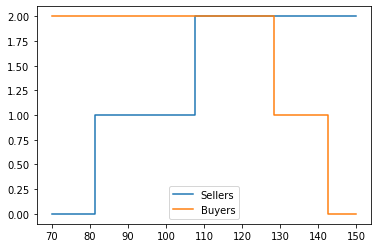

In [95]:
sellers = generate_seller_prices_paper(2)
buyers = generate_buyer_prices_paper(2)

plot_price_curves(buyers, sellers)
plt.legend()

print(compute_equilibrium_price(buyers, sellers))

In [1]:
from util import plot_price_curves
from util import compute_equilibrium_price

[148.21035517 147.21035517 127.38501868   0.        ]
[  0.          99.53523082 114.50261783 148.21035517]
3
(114.50261782989672, 127.38501868262782)


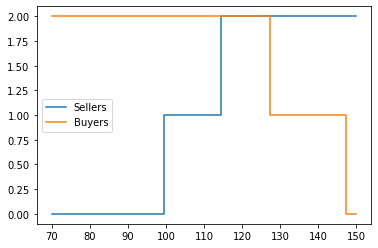

In [5]:
sellers = generate_seller_prices_paper(2)
buyers = generate_buyer_prices_paper(2)

plot_price_curves(buyers, sellers)
plt.legend()

print(compute_equilibrium_price(buyers, sellers))